# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type

# # First, create city dataframe by differnt city type
# urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
# display(urban_cities_df.head())
# suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
# display(suburban_cities_df.head())
# rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
# display(rural_cities_df.head())

# # Then get the number of ride groupby city name and count the ride_id
# #Urban
# urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
# display(urban_ride_count.head())
# # Suburban
# suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
# display(suburban_ride_count)
# # Rural
# rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
# display(rural_ride_count)

# Get number of ride by counting ride_id, and group them by each city type
city_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_ride_count


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# When we creating a combine pyber_data_df, we are looking on left side ride_data_df
# driver_count is on right side of data (city_data_df) 
# in pyber_data_df, driver count of each city name = city_name count on ride_data_df * driver_count of each city_name on city_data_df
# For example: Amandaburgh city appears 18 times in ride_data_df
#              driver_count is 12 for Amandaburge city in city_data_df
#              In pyber_data_df, new driver_count = 18*12 = 216

# Therefore, we need to use city_data_df to get accurate driver count

ori_driv = city_data_df.groupby("city").count()["driver_count"]
print("original driver count in city_data_df", ori_driv)

ori_drivsum = city_data_df["driver_count"].sum()
print("original driver sum in city_data_df: ", ori_drivsum)

drivercount = pyber_data_df.groupby("city").count()["driver_count"]
print("pyber_data_df: ", drivercount)

driversum = pyber_data_df["driver_count"].sum()
print("pyber_data_df driver_count sum: " ,driversum)

original driver count in city_data_df city
Amandaburgh         1
Barajasview         1
Barronchester       1
Bethanyland         1
Bradshawfurt        1
                   ..
West Robert         1
West Samuelburgh    1
Williamsonville     1
Williamsstad        1
Williamsview        1
Name: driver_count, Length: 120, dtype: int64
original driver sum in city_data_df:  2973
pyber_data_df:  city
Amandaburgh         18
Barajasview         22
Barronchester       16
Bethanyland         18
Bradshawfurt        10
                    ..
West Robert         31
West Samuelburgh    25
Williamsonville     14
Williamsstad        23
Williamsview        20
Name: driver_count, Length: 120, dtype: int64
pyber_data_df driver_count sum:  68709


In [6]:
# 2. Get the total drivers for each city type

# As reference from cell below, 
# we're using city_data_df to get the accurate total driver 
city_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
city_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
# #Urban
# urban_fare_count = urban_cities_df.groupby(["city"]).sum()["fare"]
# display(urban_fare_count.head())

# #Suburban
# suburban_fare_count = suburban_cities_df.groupby(["city"]).sum()["fare"]
# display(suburban_fare_count.head())

# #Rural
# rural_fare_count = rural_cities_df.groupby(["city"]).sum()["fare"]
# display(rural_fare_count.head())

city_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
city_fare_count

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = city_fare_count / city_ride_count
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = city_fare_count / city_driver_count
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
               "Total Rides": city_ride_count,
               "Total Drivers": city_driver_count,
               "Total Fares": city_fare_count,
               "Average Fare per Ride": avg_fare_per_ride,
               "Average Fare per Driver": avg_fare_per_driver})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  8. Format the columns.
pyber_summary_df["Total Fares"]=pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame

#create a new dataframe
new_pyber_data_df = pyber_data_df
display(new_pyber_data_df.head())
new_pyber_data_df.info()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

# Groupby type, then date. get sum fares of each 
date_sum_fare_df = new_pyber_data_df.groupby(['type','date']).sum()["fare"]
date_sum_fare_df 

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [15]:
new_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [16]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
new_pyber_data_df = new_pyber_data_df.reset_index()
new_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         2375 non-null   int64  
 1   city          2375 non-null   object 
 2   date          2375 non-null   object 
 3   fare          2375 non-null   float64
 4   ride_id       2375 non-null   int64  
 5   driver_count  2375 non-null   int64  
 6   type          2375 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 130.0+ KB


In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_per_date_pivot = new_pyber_data_df.pivot(index = 'date', columns = 'type', values = 'fare')
fare_per_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [18]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_april_2019_df = fare_per_date_pivot.loc['2019-01-01':'2019-04-29']
jan_april_2019_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [19]:
jan_april_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6+ KB


In [20]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
jan_april_2019_df.index = pd.to_datetime(jan_april_2019_df.index)
jan_april_2019_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [21]:
# 7. Check that the datatype for the index is datetime using df.info()
# DatetimeIndex:...
jan_april_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [22]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
week_jan_april_2019_df = jan_april_2019_df.resample('W').sum()
week_jan_april_2019_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


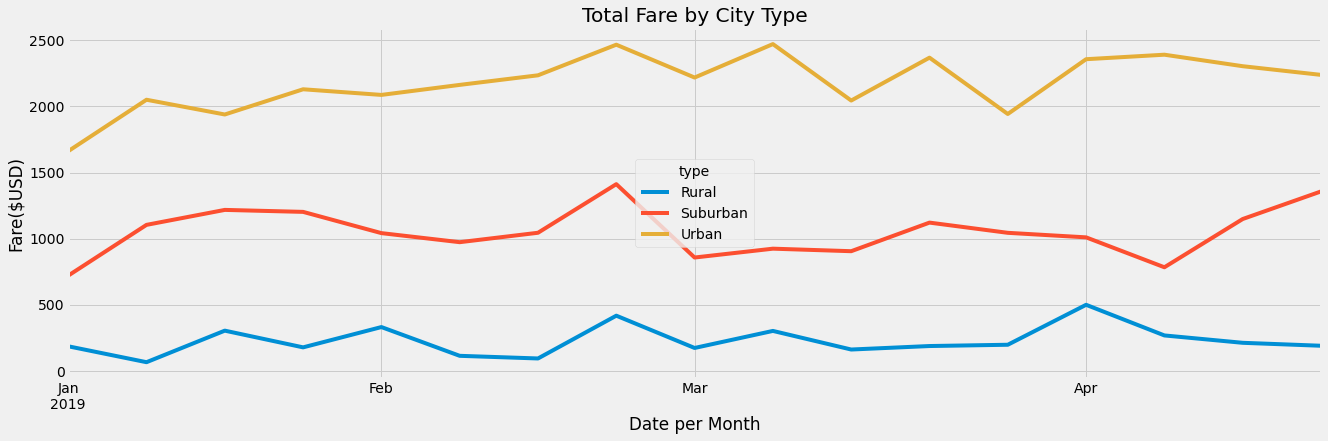

In [23]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
week_jan_april_2019_df.plot(figsize = (20,6))

# plt.style.use('dark_background')
# print(plt.style.available)
plt.xlabel("Date per Month")
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()





